# Concrete Slump Test Regression

The concrete slump test measures the consistency of fresh concrete before it sets. It is performed to check the workability of freshly made concrete, and therefore the ease with which concrete flows. It can also be used as an indicator of an improperly mixed batch.

<img src="https://i0.wp.com/civiconcepts.com/wp-content/uploads/2019/08/Slump-Cone-test-of-concrete.jpg?fit=977%2C488&ssl=1">

Our data set consists of various cement properties and the resulting slump test metrics in cm. Later on the set concrete is tested for its compressive strength 28 days later.

Input variables (9):

(component kg in one M^3 concrete)(7):
* Cement
* Slag
* Fly ash
* Water
* SP
* Coarse Aggr.
* Fine Aggr.

(Measurements)(2)
* SLUMP (cm)
* FLOW (cm)

Target variable (1):
* **28-day Compressive Strength (Mpa)**

Data Source: https://archive.ics.uci.edu/ml/datasets/Concrete+Slump+Test

*Credit: Yeh, I-Cheng, "Modeling slump flow of concrete using second-order regressions and artificial neural networks," Cement and Concrete Composites, Vol.29, No. 6, 474-480, 2007.*

# Importing dependencies

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Loading data

In [1]:
df = pd.read_csv("cement_slump.csv")
df

<IPython.core.display.Javascript object>

Cement   Slag  Fly ash  Water    SP  Coarse Aggr.  Fine Aggr.  SLUMP(cm)  \
0     273.0   82.0    105.0  210.0   9.0         904.0       680.0       23.0   
1     163.0  149.0    191.0  180.0  12.0         843.0       746.0        0.0   
2     162.0  148.0    191.0  179.0  16.0         840.0       743.0        1.0   
3     162.0  148.0    190.0  179.0  19.0         838.0       741.0        3.0   
4     154.0  112.0    144.0  220.0  10.0         923.0       658.0       20.0   
..      ...    ...      ...    ...   ...           ...         ...        ...   
98    248.3  101.0    239.1  168.9   7.7         954.2       640.6        0.0   
99    248.0  101.0    239.9  169.1   7.7         949.9       644.1        2.0   
100   258.8   88.0    239.6  175.3   7.6         938.9       646.0        0.0   
101   297.1   40.9    239.9  194.0   7.5         908.9       651.8       27.5   
102   348.7    0.1    223.1  208.5   9.6         786.2       758.1       29.0   

     FLOW(cm)  Compressive Strength (28-day)(Mpa)  
0        62.0                               34.99  
1        20.0                               41.14  
2        20.0                               41.81  
3        21.5                               42.08  
4        64.0                               26.82  
..        ...                                 ...  
98       20.0                               49.97  
99       20.0                               50.23  
100      20.0                               50.50  
101      67.0                               49.17  
102      78.0                               48.70  

[103 rows x 10 columns]

# EDA and Graphical analysis

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Cement                              103 non-null    float64
 1   Slag                                103 non-null    float64
 2   Fly ash                             103 non-null    float64
 3   Water                               103 non-null    float64
 4   SP                                  103 non-null    float64
 5   Coarse Aggr.                        103 non-null    float64
 6   Fine Aggr.                          103 non-null    float64
 7   SLUMP(cm)                           103 non-null    float64
 8   FLOW(cm)                            103 non-null    float64
 9   Compressive Strength (28-day)(Mpa)  103 non-null    float64
dtypes: float64(10)
memory usage: 8.2 KB


In [4]:
df.shape

(103, 10)

In [6]:
df.describe().T

count        mean        std     min  \
Cement                              103.0  229.894175  78.877230  137.00   
Slag                                103.0   77.973786  60.461363    0.00   
Fly ash                             103.0  149.014563  85.418080    0.00   
Water                               103.0  197.167961  20.208158  160.00   
SP                                  103.0    8.539806   2.807530    4.40   
Coarse Aggr.                        103.0  883.978641  88.391393  708.00   
Fine Aggr.                          103.0  739.604854  63.342117  640.60   
SLUMP(cm)                           103.0   18.048544   8.750844    0.00   
FLOW(cm)                            103.0   49.610680  17.568610   20.00   
Compressive Strength (28-day)(Mpa)  103.0   36.038738   7.837120   17.19   

                                       25%     50%      75%      max  
Cement                              152.00  248.00  303.900   374.00  
Slag                                  0.05  100.00  125.000   193.00  
Fly ash                             115.50  164.00  235.950   260.00  
Water                               180.00  196.00  209.500   240.00  
SP                                    6.00    8.00   10.000    19.00  
Coarse Aggr.                        819.50  879.00  952.800  1049.90  
Fine Aggr.                          684.50  742.70  788.000   902.00  
SLUMP(cm)                            14.50   21.50   24.000    29.00  
FLOW(cm)                             38.50   54.00   63.750    78.00  
Compressive Strength (28-day)(Mpa)   30.90   35.52   41.205    58.53

<IPython.core.display.Javascript object>

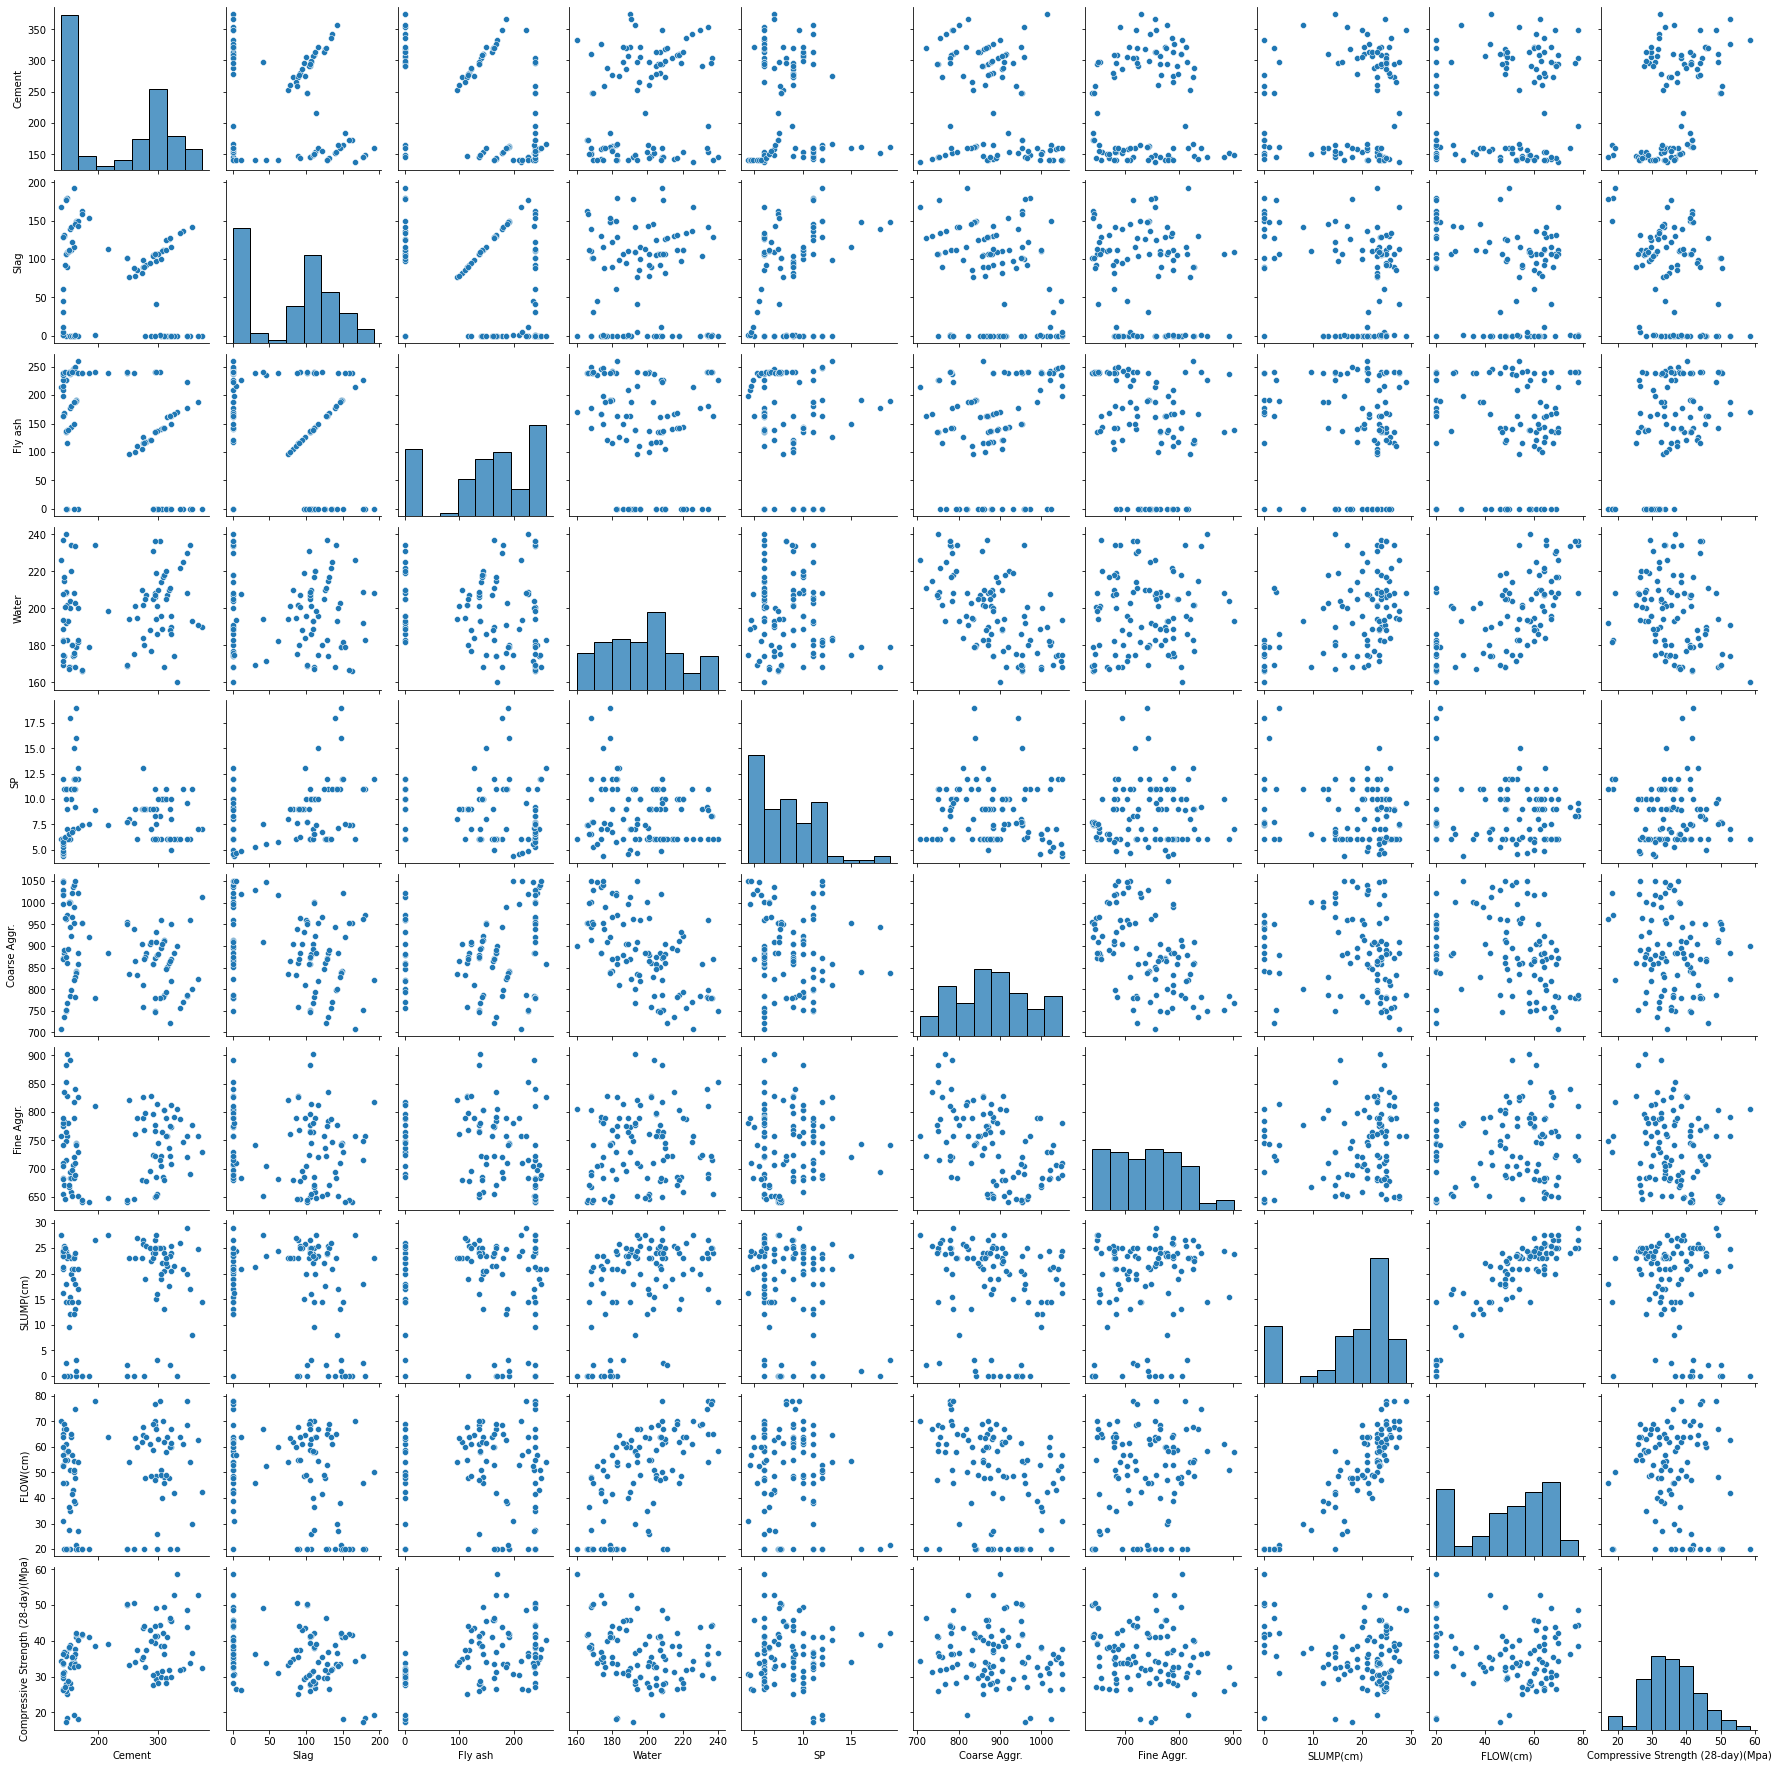

In [2]:
sns.pairplot(df);

<IPython.core.display.Javascript object>

<AxesSubplot:>

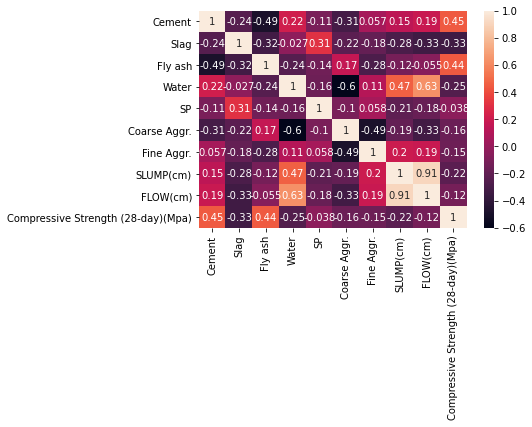

In [8]:
sns.heatmap(df.corr(),annot=True)

# Data Preprocessing 

### Features and target variable

In [13]:
df.drop(df.columns[8:],axis=1)  #flow-slump r=0.91 old. için birisini almadım.

Cement   Slag  Fly ash  Water    SP  Coarse Aggr.  Fine Aggr.  SLUMP(cm)
0     273.0   82.0    105.0  210.0   9.0         904.0       680.0       23.0
1     163.0  149.0    191.0  180.0  12.0         843.0       746.0        0.0
2     162.0  148.0    191.0  179.0  16.0         840.0       743.0        1.0
3     162.0  148.0    190.0  179.0  19.0         838.0       741.0        3.0
4     154.0  112.0    144.0  220.0  10.0         923.0       658.0       20.0
..      ...    ...      ...    ...   ...           ...         ...        ...
98    248.3  101.0    239.1  168.9   7.7         954.2       640.6        0.0
99    248.0  101.0    239.9  169.1   7.7         949.9       644.1        2.0
100   258.8   88.0    239.6  175.3   7.6         938.9       646.0        0.0
101   297.1   40.9    239.9  194.0   7.5         908.9       651.8       27.5
102   348.7    0.1    223.1  208.5   9.6         786.2       758.1       29.0

[103 rows x 8 columns]

In [34]:
df.iloc[:,9]

0      34.99
1      41.14
2      41.81
3      42.08
4      26.82
       ...  
98     49.97
99     50.23
100    50.50
101    49.17
102    48.70
Name: Compressive Strength (28-day)(Mpa), Length: 103, dtype: float64

In [35]:
X=df.drop(df.columns[8:],axis=1)
y=df.iloc[:,9]

### Splitting data into training and testing

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)

In [38]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (82, 8)
Train target shape   :  (82,)
Test features shape  :  (21, 8)
Test target shape    :  (21,)


## Scaling

##  1. Model Building (Linear Regression)

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
model = LinearRegression()

In [41]:
model.fit(X_train, y_train)

LinearRegression()

### 1.1 Interpret the model

In [48]:
y_pred = model.predict(X_test)
y_pred 

array([44.67898274, 41.67136645, 28.31991755, 39.02922851, 35.56068273,
       39.80752049, 37.13280322, 30.72751883, 28.87724873, 34.19789922,
       44.73635307, 46.26668076, 44.78078274, 32.48958647, 33.92508274,
       26.40201737, 29.01756811, 38.42053515, 30.18560618, 42.16206173,
       48.86124772])

In [43]:
my_dict = {"Actual": y_test, "Pred": y_pred, "Residual":y_test-y_pred}

In [44]:
 y_test

30     45.82
67     40.34
62     28.29
47     43.01
42     33.51
40     35.66
90     35.52
45     31.77
10     26.02
0      34.99
18     49.30
31     43.95
97     44.08
85     30.97
76     32.57
4      26.82
79     30.43
33     35.52
12     31.37
26     42.08
100    50.50
Name: Compressive Strength (28-day)(Mpa), dtype: float64

In [45]:
 y_pred

array([44.67898274, 41.67136645, 28.31991755, 39.02922851, 35.56068273,
       39.80752049, 37.13280322, 30.72751883, 28.87724873, 34.19789922,
       44.73635307, 46.26668076, 44.78078274, 32.48958647, 33.92508274,
       26.40201737, 29.01756811, 38.42053515, 30.18560618, 42.16206173,
       48.86124772])

In [49]:
y_test-y_pred

30     1.141017
67    -1.331366
62    -0.029918
47     3.980771
42    -2.050683
40    -4.147520
90    -1.612803
45     1.042481
10    -2.857249
0      0.792101
18     4.563647
31    -2.316681
97    -0.700783
85    -1.519586
76    -1.355083
4      0.417983
79     1.412432
33    -2.900535
12     1.184394
26    -0.082062
100    1.638752
Name: Compressive Strength (28-day)(Mpa), dtype: float64

In [46]:
my_dict 

{'Actual': 30     45.82
 67     40.34
 62     28.29
 47     43.01
 42     33.51
 40     35.66
 90     35.52
 45     31.77
 10     26.02
 0      34.99
 18     49.30
 31     43.95
 97     44.08
 85     30.97
 76     32.57
 4      26.82
 79     30.43
 33     35.52
 12     31.37
 26     42.08
 100    50.50
 Name: Compressive Strength (28-day)(Mpa), dtype: float64,
 'Pred': array([44.67898274, 41.67136645, 28.31991755, 39.02922851, 35.56068273,
        39.80752049, 37.13280322, 30.72751883, 28.87724873, 34.19789922,
        44.73635307, 46.26668076, 44.78078274, 32.48958647, 33.92508274,
        26.40201737, 29.01756811, 38.42053515, 30.18560618, 42.16206173,
        48.86124772]),
 'Residual': 30     1.141017
 67    -1.331366
 62    -0.029918
 47     3.980771
 42    -2.050683
 40    -4.147520
 90    -1.612803
 45     1.042481
 10    -2.857249
 0      0.792101
 18     4.563647
 31    -2.316681
 97    -0.700783
 85    -1.519586
 76    -1.355083
 4      0.417983
 79     1.412432
 33    -2.900

In [51]:
comparing=pd.DataFrame(my_dict)
comparing

<IPython.core.display.Javascript object>

Actual       Pred  Residual
30    45.82  44.678983  1.141017
67    40.34  41.671366 -1.331366
62    28.29  28.319918 -0.029918
47    43.01  39.029229  3.980771
42    33.51  35.560683 -2.050683
40    35.66  39.807520 -4.147520
90    35.52  37.132803 -1.612803
45    31.77  30.727519  1.042481
10    26.02  28.877249 -2.857249
0     34.99  34.197899  0.792101
18    49.30  44.736353  4.563647
31    43.95  46.266681 -2.316681
97    44.08  44.780783 -0.700783
85    30.97  32.489586 -1.519586
76    32.57  33.925083 -1.355083
4     26.82  26.402017  0.417983
79    30.43  29.017568  1.412432
33    35.52  38.420535 -2.900535
12    31.37  30.185606  1.184394
26    42.08  42.162062 -0.082062
100   50.50  48.861248  1.638752

<IPython.core.display.Javascript object>

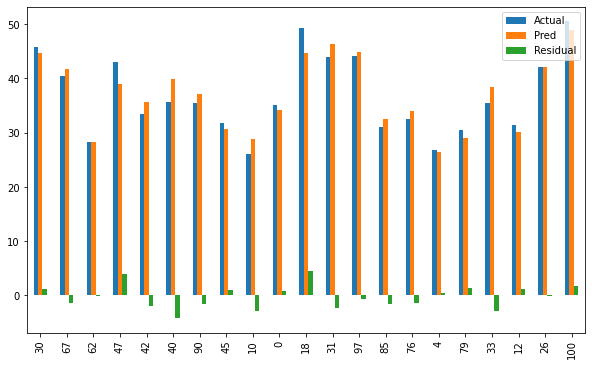

In [53]:
comparing.plot(kind ="bar", figsize=(10,6))
plt.show()

### 1.2 Model Evaluation

In [54]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [69]:
R2_score_test = r2_score(y_test, y_pred)
R2_score_test

0.9074704561161081

In [70]:
R2_score_train = r2_score(y_train, y_train_pred)
R2_score_train

0.903511560290712

In [56]:
mae = mean_absolute_error(y_test, y_pred)     
mae

1.7656117609740432

In [57]:
mse = mean_squared_error(y_test, y_pred)
mse

4.681737894014138

In [58]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

<IPython.core.display.Javascript object>

2.1637323988918173

In [60]:
Comp_Strength_mean = df["Compressive Strength (28-day)(Mpa)" ].mean()
Comp_Strength_mean

36.03873786407767

In [61]:
mae/Comp_Strength_mean

0.04899205315217079

In [62]:
rmse/Comp_Strength_mean

0.060039072596062275

In [63]:
def eval_metric(actual, pred):
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    rmse = np.sqrt(mean_squared_error(actual, pred))
    R2_score = r2_score(actual, pred)
    print("Model testing performance:")
    print("--------------------------")
    print(f"R2_score \t: {R2_score}")
    print(f"MAE \t\t: {mae}")
    print(f"MSE \t\t: {mse}")
    print(f"RMSE \t\t: {rmse}")

In [64]:
eval_metric(y_test, y_pred)

<IPython.core.display.Javascript object>

Model testing performance:
--------------------------
R2_score 	: 0.9074704561161081
MAE 		: 1.7656117609740432
MSE 		: 4.681737894014138
RMSE 		: 2.1637323988918173


In [66]:
y_train_pred = model.predict(X_train)

In [67]:
eval_metric(y_train, y_train_pred)

<IPython.core.display.Javascript object>

Model testing performance:
--------------------------
R2_score 	: 0.903511560290712
MAE 		: 1.9245727560767643
MSE 		: 6.104174819058379
RMSE 		: 2.470662829901802


# 2. Regularization

## 2.1 Ridge (Apply and evaluate)

## 2.2 Lasso (Apply and evalute)

## 2.3 Elastic-Net (Apply and evaluate )
* Use Gridsearch for hyperparameter tuning instead of ElacticnetCV